In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D

In [3]:
from keras.optimizers import Adam

In [4]:
from sklearn.metrics import classification_report
from collections import Counter

In [5]:
from keras.utils import to_categorical

In [6]:
from keras.datasets import cifar10

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
objects = ['airplane','automobile','bird', 'catdeer', 'dog', 'frog', 'horse','ship', 'truck']

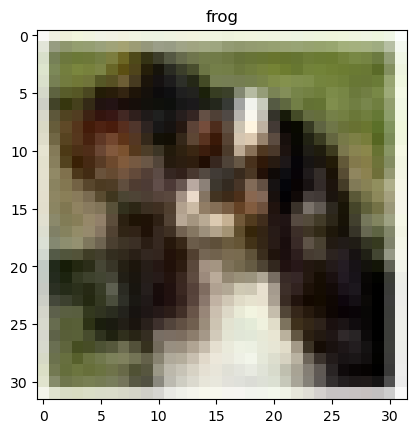

In [10]:
image_index = 500
obj_name= objects[y_train[image_index][0]]  #for zeroth element
plt.imshow(x_train[image_index])
plt.title(obj_name)
plt.show()

In [11]:
cnn = Sequential()

cnn.add(Conv2D(input_shape= (32, 32, 3), 
               filters= 5, 
               kernel_size= (3, 3), activation = 'relu'))
cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(filters= 10, 
               kernel_size= (3, 3), activation = 'relu'))
cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(filters= 20, 
               kernel_size= (3, 3), activation = 'relu'))
cnn.add(Dropout(0.2))
#cnn.add(MaxPooling2D())

cnn.add(Conv2D(filters= 40, 
               kernel_size= (3, 3), activation = 'relu'))
cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D())

cnn.add(Flatten())

cnn.add(Dense(units= 64, activation= 'relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(units=10, activation= 'softmax'))

cnn.compile(loss= 'categorical_crossentropy', metrics= ['acc'], optimizer= 'adam')

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 5)         140       
                                                                 
 dropout (Dropout)           (None, 30, 30, 5)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 5)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 10)        460       
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 10)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 10)          0         
 g2D)                                                   

In [12]:
x_train = x_train / 255
x_test = x_test / 255

In [13]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [14]:
y_train = to_categorical(y_train)

In [15]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [17]:
es= EarlyStopping(monitor= 'val_loss', patience=5)
checkpoint= ModelCheckpoint(filepath= 'ciphar_10_checkpoint.h5',
                            save_best_only=True, 
                            save_weights_only=False
                           )

In [18]:
history= cnn.fit(x_train, y_train, 
          validation_split= 0.15, 
          callbacks= [es, checkpoint], 
          epochs= 20
         )

Epoch 1/20
1329/1329 [==============================] - 16s 11ms/step - loss: 1.8683 - acc: 0.2937 - val_loss: 1.7524 - val_acc: 0.3797
Epoch 2/20
  11/1329 [..............................] - ETA: 14s - loss: 1.6536 - acc: 0.3920

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1329/1329 [==============================] - 17s 12ms/step - loss: 1.6034 - acc: 0.4110 - val_loss: 1.6396 - val_acc: 0.4363
Epoch 3/20
1329/1329 [==============================] - 17s 13ms/step - loss: 1.5231 - acc: 0.4468 - val_loss: 1.5468 - val_acc: 0.4601
Epoch 4/20
1329/1329 [==============================] - 17s 12ms/step - loss: 1.4770 - acc: 0.4641 - val_loss: 1.5746 - val_acc: 0.4425
Epoch 5/20
1329/1329 [==============================] - 17s 13ms/step - loss: 1.4453 - acc: 0.4743 - val_loss: 1.5479 - val_acc: 0.4467
Epoch 6/20
1329/1329 [==============================] - 16s 12ms/step - loss: 1.4141 - acc: 0.4895 - val_loss: 1.4302 - val_acc: 0.4999
Epoch 7/20
1329/1329 [==============================] - 17s 13ms/step - loss: 1.3945 - acc: 0.4991 - val_loss: 1.4038 - val_acc: 0.4988
Epoch 8/20
1329/1329 [==============================] - 19s 14ms/step - loss: 1.3716 - acc: 0.5064 - val_loss: 1.4150 - val_acc: 0.5040
Epoch 9/20
1329/1329 [==============================] - 16s

In [19]:
y_pred = cnn.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [20]:
y_pred[5] * 100

array([ 1.0761437,  0.7126326,  7.0942154, 12.055044 , 13.473792 ,
        4.1316705, 59.839897 ,  0.7461613,  0.6899896,  0.1804493],
      dtype=float32)

In [21]:
np.argmax(y_pred[5])

6

In [22]:
y_pred_class = y_pred.argmax(axis = 1)

In [23]:
y_pred_class[5]

6

In [24]:
y_pred_proba = y_pred.max(axis = 1)

In [25]:
y_pred_proba[5]

0.598399

In [26]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.72      0.39      0.51      1000
           1       0.79      0.61      0.69      1000
           2       0.51      0.37      0.43      1000
           3       0.34      0.51      0.41      1000
           4       0.41      0.70      0.51      1000
           5       0.50      0.40      0.45      1000
           6       0.59      0.65      0.62      1000
           7       0.82      0.47      0.60      1000
           8       0.52      0.85      0.65      1000
           9       0.73      0.48      0.58      1000

    accuracy                           0.54     10000
   macro avg       0.59      0.54      0.54     10000
weighted avg       0.59      0.54      0.54     10000



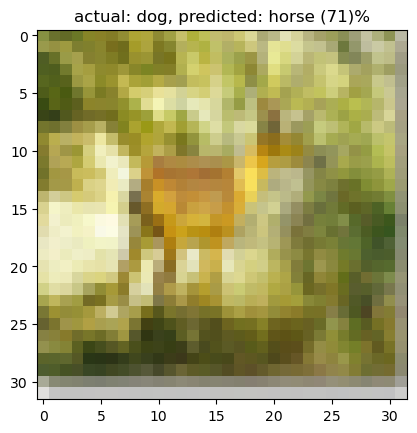

In [27]:
image_index = 500
plt.imshow(x_test[image_index])
pred_obj = objects[y_pred_class[image_index]]
proba = int(y_pred_proba[image_index] * 100)
actual_object = objects[y_test[image_index][0]]
plt.title(f'actual: {actual_object}, predicted: {pred_obj} ({proba})%')
plt.show()